In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm, binom
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import normaltest, ranksums, mannwhitneyu, ttest_ind, tukey_hsd, f_oneway
import tqdm

In [51]:
# Define the distribution to sample
# ctrl_m, ctrl_s = 0.675, 0.17
# m1_m, m1_s = 0.68, 0.2
# m2_m, m2_s = 0.66, 0.2
# m3_m, m3_s = 0.70, 0.18
# m4_m, m4_s = 0.76, 0.19

ctrl_m, ctrl_s = 0.46, 0.17
m1_m, m1_s = 0.50, 0.3
m2_m, m2_s = 0.48, 0.3
m3_m, m3_s = 0.59, 0.3
m4_m, m4_s = 0.604, 0.19

ctrl_dist = scipy.stats.norm(loc=ctrl_m, scale=ctrl_s)
m1_dist = scipy.stats.norm(loc=m1_m, scale=m1_s)
m2_dist = scipy.stats.norm(loc=m2_m, scale=m2_s)
m3_dist = scipy.stats.norm(loc=m3_m, scale=m3_s)
m4_dist = scipy.stats.norm(loc=m4_m, scale=m4_s)

In [91]:
# different measurements for easy and hard

ctrl_easy_m, ctrl_easy_s = 0.95, 0.08
m1_easy_m, m1_easy_s = 0.97, 0.2
m2_easy_m, m2_easy_s = 0.99, 0.1
m3_easy_m, m3_easy_s = 0.98, 0.11
m4_easy_m, m4_easy_s = 0.86, 0.12

ctrl_hard_m, ctrl_hard_s = 0.40, 0.2
m1_hard_m, m1_hard_s = 0.42, 0.18
m2_hard_m, m2_hard_s = 0.48, 0.15
m3_hard_m, m3_hard_s = 0.51, 0.17
m4_hard_m, m4_hard_s = 0.65, 0.22

ctrl_hard_time_m, ctrl_hard_time_s = 60.1, 20
m1_hard_time_m, m1_hard_time_s = 64.4, 20
m2_hard_time_m, m2_hard_time_s = 59.4, 20
m3_hard_time_m, m3_hard_time_s = 57.4, 20
m4_hard_time_m, m4_hard_time_s = 56.4, 19.8

ctrl_easy_time_m, ctrl_easy_time_s = 47.7, 6
m1_easy_time_m, m1_easy_time_s = 47.1, 20
m2_easy_time_m, m2_easy_time_s = 48.1, 20
m3_easy_time_m, m3_easy_time_s = 42.1, 20
m4_easy_time_m, m4_easy_time_s = 43.1, 18.4

ctrl_hard_dist = scipy.stats.norm(loc=ctrl_hard_m, scale=ctrl_hard_s)
m1_hard_dist = scipy.stats.norm(loc=m1_hard_m, scale=m1_hard_s)
m2_hard_dist = scipy.stats.norm(loc=m2_hard_m, scale=m2_hard_s)
m3_hard_dist = scipy.stats.norm(loc=m3_hard_m, scale=m3_hard_s)
m4_hard_dist = scipy.stats.norm(loc=m4_hard_m, scale=m4_hard_s)

ctrl_easy_dist = scipy.stats.norm(loc=ctrl_easy_m, scale=ctrl_easy_s)
m1_easy_dist = scipy.stats.norm(loc=m1_easy_m, scale=m1_easy_s)
m2_easy_dist = scipy.stats.norm(loc=m2_easy_m, scale=m2_easy_s)
m3_easy_dist = scipy.stats.norm(loc=m3_easy_m, scale=m3_easy_s)
m4_easy_dist = scipy.stats.norm(loc=m4_easy_m, scale=m4_easy_s)

ctrl_hard_time_dist = scipy.stats.norm(loc=ctrl_hard_time_m, scale=ctrl_hard_time_s)
m1_hard_time_dist = scipy.stats.norm(loc=m1_hard_time_m, scale=m1_hard_time_s)
m2_hard_time_dist = scipy.stats.norm(loc=m2_hard_time_m, scale=m2_hard_time_s)
m3_hard_time_dist = scipy.stats.norm(loc=m3_hard_time_m, scale=m3_hard_time_s)
m4_hard_time_dist = scipy.stats.norm(loc=m4_hard_time_m, scale=m4_hard_time_s)

ctrl_easy_time_dist = scipy.stats.norm(loc=ctrl_easy_time_m, scale=ctrl_easy_time_s)
m1_easy_time_dist = scipy.stats.norm(loc=m1_easy_time_m, scale=m1_easy_time_s)
m2_easy_time_dist = scipy.stats.norm(loc=m2_easy_time_m, scale=m2_easy_time_s)
m3_easy_time_dist = scipy.stats.norm(loc=m3_easy_time_m, scale=m3_easy_time_s)
m4_easy_time_dist = scipy.stats.norm(loc=m4_easy_time_m, scale=m4_easy_time_s)

In [309]:
## Simulations with Permutation Tests

def perm_test(x, y, rs=0):
    def statistic(x, y, axis):
        return np.mean(x, axis=axis) - np.mean(y, axis=axis)
    res = scipy.stats.permutation_test(
        (x, y), 
        statistic, 
        vectorized=True,
        alternative='less',
        random_state=rs
    )
    return res

def single_sim_cont(ctrl_hard_dist, sample_dist, ssize, rs=0):
    ctrl_hard_data = ctrl_hard_dist.rvs(size=ssize, random_state=rs)
    m1_hard_data = sample_dist.rvs(size=ssize, random_state=rs)
    m2_hard_data = sample_dist.rvs(size=ssize, random_state=rs)
    m3_hard_data = sample_dist.rvs(size=ssize, random_state=rs)
    m4_hard_data = sample_dist.rvs(size=ssize, random_state=rs)
    
    tests = [
                perm_test(ctrl_hard_data, m1_hard_data, rs=rs),
                perm_test(ctrl_hard_data, m2_hard_data, rs=rs),
                perm_test(ctrl_hard_data, m3_hard_data, rs=rs),
                perm_test(ctrl_hard_data, m4_hard_data, rs=rs),
            ]
    
    assert(len(tests) == no_tests)

    rej, pvals_corrected, alphacSidak, alphacBonf = multipletests(
        [x.pvalue for x in tests],
        alpha=alpha,
        method='hs'
    )
    return rej * 1.0

def single_sim_disc(ctrl, sample, ssize, rs=0):
    num_qs = 12
    supp = np.arange(num_qs+1) / num_qs
    probs = scipy.stats.norm(ctrl[0], ctrl[1])
    probs = probs.pdf(supp)
    probs /= np.sum(probs)
    
    probs_ = scipy.stats.norm(sample[0], sample[1])
    probs_ = probs_.pdf(supp)
    probs_ /= np.sum(probs_)
    
    np.random.seed(rs)
    ctrl_hard_data = np.random.choice(supp, size=ssize, p=probs)
    np.random.seed(rs)
    m1_hard_data = np.random.choice(supp, size=ssize, p=probs_)
    np.random.seed(rs)
    m2_hard_data = np.random.choice(supp, size=ssize, p=probs_)
    np.random.seed(rs)
    m3_hard_data = np.random.choice(supp, size=ssize, p=probs_)
    np.random.seed(rs)
    m4_hard_data = np.random.choice(supp, size=ssize, p=probs_)
    
    tests = [
                perm_test(ctrl_hard_data, m1_hard_data, rs=rs),
                perm_test(ctrl_hard_data, m2_hard_data, rs=rs),
                perm_test(ctrl_hard_data, m3_hard_data, rs=rs),
                perm_test(ctrl_hard_data, m4_hard_data, rs=rs),
            ]
    
    assert(len(tests) == no_tests)

    rej, pvals_corrected, alphacSidak, alphacBonf = multipletests(
        [x.pvalue for x in tests],
        alpha=alpha,
        method='hs'
    )
    return rej * 1.0

from joblib import Parallel, delayed
import multiprocessing
num_core = multiprocessing.cpu_count()

TYPE = 'disc'

effect_size_lst = [0.05, 0.1, 0.15, 0.2]
effect_size_lst = [0.11, 0.12, 0.13, 0.14]
alpha = 0.05
power = 0.8
sample_sizes = list(range(5, 60, 5))
num_sim = 1000

no_tests = 4
power_curve = np.empty((len(effect_size_lst), len(sample_sizes), no_tests, 2))

ctrl_hard_m, ctrl_hard_s = 0.4, 0.2

if TYPE == 'disc':
    # sample from discrete choices
    ctrl_hard_dist = (ctrl_hard_m, ctrl_hard_s)
    for k, es in tqdm.tqdm(enumerate(effect_size_lst)):
        sample_dist = (ctrl_hard_m + es, ctrl_hard_s)
        for i, ssize in tqdm.tqdm(enumerate(sample_sizes)): # for different sample size
            rej_list = Parallel(n_jobs=num_core)(
                delayed(single_sim_disc)(
                    ctrl_hard_dist, 
                    sample_dist, 
                    ssize, 
                    rs=7*si+1
                ) for si in range(num_sim)
            )
            rej_vec = np.array(rej_list).sum(axis=0) / num_sim

            power_curve[k,i,:,0] = ssize
            power_curve[k,i,:,1] = rej_vec

elif TYPE == 'cont':
    # Assume normal distribution
    ctrl_hard_dist = scipy.stats.norm(loc=ctrl_hard_m, scale=ctrl_hard_s)
    for k, es in tqdm.tqdm(enumerate(effect_size_lst)):
        sample_dist = scipy.stats.norm(loc=ctrl_hard_m+es, scale=ctrl_hard_s)
        for i, ssize in tqdm.tqdm(enumerate(sample_sizes)): # for different sample size
            rej_list = Parallel(n_jobs=num_core)(
                delayed(single_sim_cont)(
                    ctrl_hard_dist, 
                    sample_dist, 
                    ssize, 
                    rs=7*si+1
                ) for si in range(num_sim)
            )
            rej_vec = np.array(rej_list).sum(axis=0) / num_sim

            power_curve[k,i,:,0] = ssize
            power_curve[k,i,:,1] = rej_vec

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:02,  2.66s/it]
2it [00:18, 10.14s/it]
3it [00:34, 13.22s/it]
4it [00:54, 15.72s/it]
5it [01:14, 17.26s/it]
6it [01:35, 18.59s/it]
7it [01:56, 19.44s/it]
8it [02:21, 20.96s/it]
9it [02:45, 22.14s/it]
10it [03:11, 23.26s/it]
11it [03:38, 19.88s/it]
1it [03:38, 218.69s/it]
0it [00:00, ?it/s]
1it [00:01,  1.95s/it]
2it [00:18, 10.34s/it]
3it [00:35, 13.58s/it]
4it [00:54, 15.58s/it]
5it [01:13, 16.87s/it]
6it [01:34, 18.15s/it]
7it [01:55, 19.25s/it]
8it [02:18, 20.37s/it]
9it [02:42, 21.59s/it]
10it [03:07, 22.73s/it]
11it [03:34, 19.53s/it]
2it [07:13, 216.41s/it]
0it [00:00, ?it/s]
1it [00:02,  2.11s/it]
2it [00:18, 10.45s/it]
3it [00:35, 13.59s/it]
4it [00:53, 15.39s/it]
5it [01:13, 16.86s/it]
6it [01:33, 18.04s/it]
7it [01:55, 19.25s/it]
8it [02:18, 20.39s/it]
9it [02:42, 21.53s/it]
10it [03:07, 22.70s/it]
11it [03:33, 19.45s/it]
3it [10:47, 215.29s/it]
0it [00:00, ?it/s]
1it [00:01,  1.78s/it]
2it [00:18, 10.60s/it]
3it [00:36, 13.82s/it]

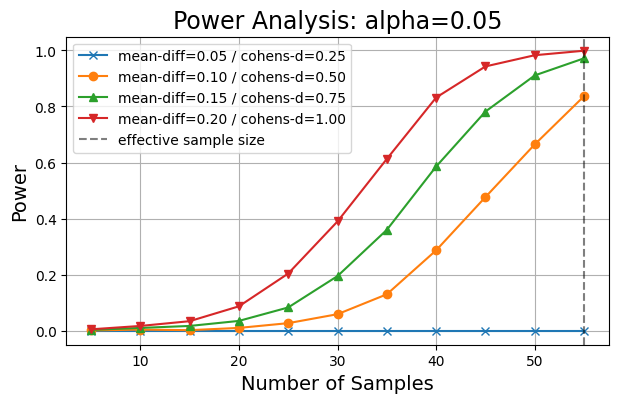

In [25]:
# plot power curve
# import pickle
# power_curve = pickle.load(open('power-curve-disc-more-alpha-0.05.pkl', 'rb'))
effect_size_list =[0.05, 0.1, 0.15, 0.2]
alpha = 0.05
no_tests = 4
f, axs = plt.subplots(figsize=(7,4))
markers = ['x', 'o', '^', 'v']
for i, es in enumerate(effect_size_list):
    x = power_curve[i,:,0,0]
    y = power_curve[i,:,:,1]
    assert(y.shape[1] == no_tests)

    #axs.plot(x, y[:,0], label='es=%f'%(es))
    axs.plot(
        x, 
        np.mean(y, axis=1), 
        label='mean-diff=%0.2f / cohens-d=%0.2f'%(es, es/0.2),
        marker=markers[i]
    )
    
axs.axvline(x = 55, label='effective sample size', color='k', linestyle='--', alpha=0.5)
axs.legend(loc='upper left')
axs.set_xlabel('Number of Samples', fontsize=14)
axs.set_title('Power Analysis: alpha=%0.2f'%alpha, fontsize=17)
axs.set_ylabel('Power', fontsize=14)
axs.grid()
plt.savefig('power.pdf', dpi=200)


[0.02280814 0.04811747 0.08533306 0.1272136  0.15942315 0.16794648
 0.14872777 0.11071714 0.06928502 0.03644731 0.01611733 0.00599132
 0.00187221]


(0.4156666666666667, 0.19162782215070498)

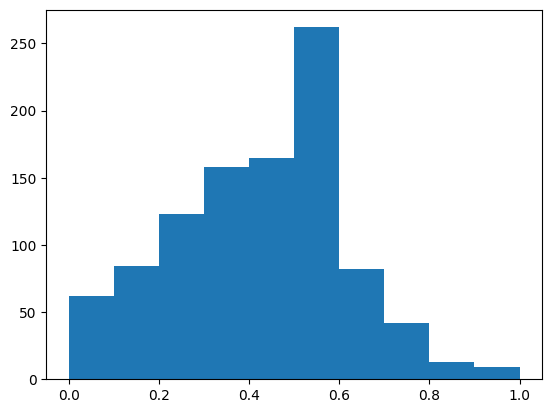

In [281]:
num_qs = 12
supp = np.arange(num_qs+1) / num_qs
d = scipy.stats.norm(0.4, 0.2)
d = d.pdf(supp)
d /= np.sum(d)
print(d)
np.random.seed(12)
data = np.random.choice(supp, size=1000, p=d)
plt.hist(data)
np.mean(data), np.std(data)